# Analyse Results

{
    "precision": 0.687,
    "recall": 0.6433,
    "f1": 0.6516
}


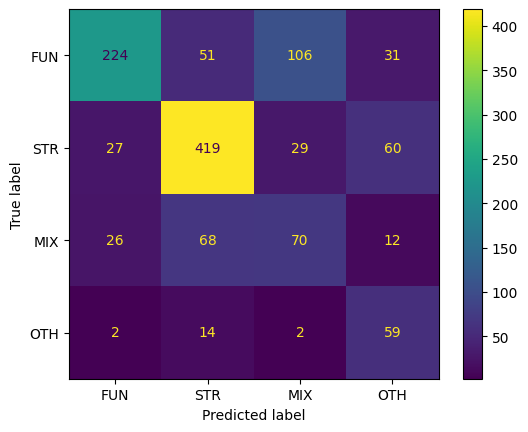

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import json
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import ast

# Set file to analyse
file_name = "gpt-3.5-turbo_prompt3"
file_name = "gpt-4o_prompt3"

# Import data
file_path = f"/home/fantoni/patent-sentence-classification/results/prompting/{file_name}.xlsx"
result_df = pd.read_excel(file_path)

# Set labels
labels = ['FUN', 'STR', 'MIX', 'OTH']
true_labels = result_df['true_class']  
predicted_labels = result_df['pred_class']

# Calculate classification metrics
precision = precision_score(true_labels, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(true_labels, predicted_labels, average='weighted', zero_division=0)
f1 = f1_score(true_labels, predicted_labels, average='weighted', zero_division=0)
results = {
    'precision': round(precision, 4),  # Rounded for better readability
    'recall': round(recall, 4),
    'f1': round(f1, 4)
}
print(json.dumps(results, indent=4))  # Pretty-print the JSON

# Save Metrics as JSON
#output_file_path = f"/home/fantoni/patent-sentence-classification/results/prompting/{file_name}.json"
#with open(output_file_path, "w") as f:
#    json.dump(results, f, indent=4)  # Save as formatted JSON

# Save Classification Report
#class_report = classification_report(true_labels, predicted_labels, labels=labels, target_names=labels, zero_division=0)
#output_file_path = f"/home/fantoni/patent-sentence-classification/results/prompting/{file_name}.txt"
#with open(output_file_path, "w") as f:
#    f.write("Classification Report:\n")
#    f.write(class_report)

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

In [5]:
# Time Analysis
avg_time_per_sent = result_df['elapsed_time_sec'].sum()/len(result_df)
total_time = result_df['elapsed_time_sec'].sum()
print(f"Time per sentence (avg) = {avg_time_per_sent:.2f}")
print(f"Total time (sec) = {total_time:.2f}")
print(f"Total time (min) = {total_time/60:.2f}")

Time per sentence (avg) = 0.55
Total time (sec) = 664.86
Total time (min) = 11.08
